# iFood CRM Data Analyst case

This notebook presents the analysis performed on the data provided in the case, aiming to showcase my abilities as a Data analyst.

In [59]:
# importing the fundamental libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import datetime
import math
from sklearn import preprocessing, metrics

In [2]:
df = pd.read_csv('C:\\Users\\Italo\\Desktop\\Projects\\ifood-data-business-analyst-test\\ml_project1_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# Checking for missing data
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [62]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

The only column with missing data is "income", which is probably an important feature for the clustering and predictive models. We will look into that, and probably assign an average value based on clustering.

But first, we will take a look in the data overall.

In [4]:
df.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,2012-08-31,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [5]:
df.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


In [6]:
# Creating "Age" column to replace "birth year" and "time_customer" to replace "Dt_Customer"

df['Age']=datetime.now().year - df['Year_Birth']
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['time_customer']= ((datetime.now()-df['Dt_Customer'])/np.timedelta64(1, 'D')).apply(math.floor)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,time_customer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,63,2932
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,66,2382
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,55,2581
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,36,2408
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,39,2430


In [7]:
#creating total spent and value spent on regular (non-gold) products
df['MntTotal'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntSweetProducts']+df['MntFishProducts']
df['MntRegular'] = df['MntTotal'] - df['MntGoldProds']

#also calculating total number of offspring (kids+teenagers)
df['Children'] = df['Kidhome'] + df['Teenhome']

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,time_customer,MntTotal,MntRegular,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,63,2932,1529,1441,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,66,2382,21,15,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,55,2581,734,692,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,36,2408,48,43,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,39,2430,407,392,1


In [8]:
#Creating column with the most consumed product for each customer
df['Most_bought'] = df[['MntWines','MntFruits','MntMeatProducts','MntSweetProducts','MntFishProducts']].idxmax(axis=1)
df['Most_bought'].replace(to_replace={'MntWines':'Wines','MntMeatProducts':'Meats','MntSweetProducts':'Sweets','MntFruits':'Fruits','MntFishProducts':'Fish'},inplace=True)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,time_customer,MntTotal,MntRegular,Children,Most_bought
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,63,2932,1529,1441,0,Wines
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,66,2382,21,15,2,Wines
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,55,2581,734,692,0,Wines
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,36,2408,48,43,1,Meats
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,39,2430,407,392,1,Wines


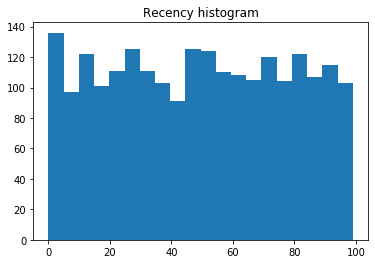

In [9]:
plt.figure(figsize=(6,4))
plt.hist(df['Recency'],bins=20)
plt.title('Recency histogram')
plt.show()

#testar com separações diferentes

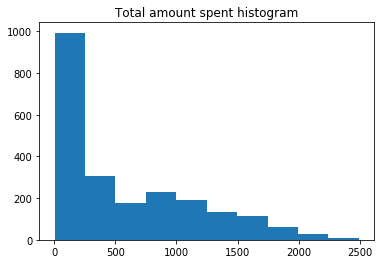

In [10]:
plt.figure(figsize=(6,4))
plt.hist(df['MntTotal'])
plt.title('Total amount spent histogram')
plt.show()

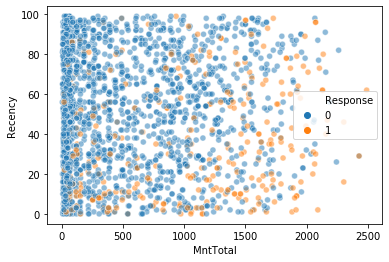

In [58]:
sns.scatterplot(x=df['MntTotal'],y=df['Recency'],hue=df['Response'],alpha=0.5)

Text(0.5, 1.0, 'Customers by most bought product')

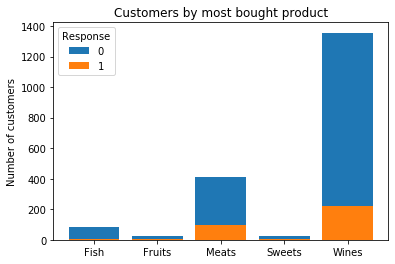

In [53]:
y0 = df.groupby(by=['Response','Most_bought']).count()['ID'][0].values
y1 = df.groupby(by=['Response','Most_bought']).count()['ID'][1].values
ind = df.groupby(by=['Response','Most_bought']).count()['ID'][0].index

ax0=plt.axes()
ax0.bar(x=ind,height=y0)
ax0.bar(x=ind,height=y1)
ax0.legend(['0','1'],title = 'Response')
ax0.set_ylabel('Number of customers')
ax0.set_title('Customers by most bought product')

Text(0.5, 1.0, 'Customers by Education level')

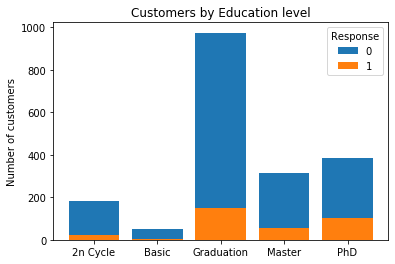

In [95]:
y0 = df.groupby(by=['Response','Education']).count()['ID'][0].values
y1 = df.groupby(by=['Response','Education']).count()['ID'][1].values
ind = df.groupby(by=['Response','Education']).count()['ID'][0].index

ax0=plt.axes()
ax0.bar(x=ind,height=y0)
ax0.bar(x=ind,height=y1)
ax0.legend(['0','1'],title = 'Response')
ax0.set_ylabel('Number of customers')
ax0.set_title('Customers by Education level')

Text(0.5, 1.0, 'Customers by Marital status')

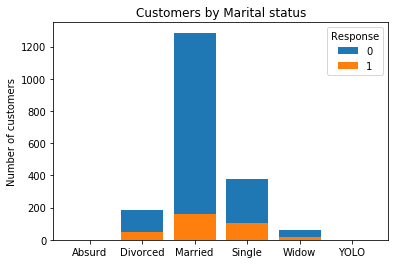

In [94]:
y0 = df.groupby(by=['Response','Marital_Status']).count()['ID'][0].values
y1 = df.groupby(by=['Response','Marital_Status']).count()['ID'][1].values
ind = df.groupby(by=['Response','Marital_Status']).count()['ID'][0].index

ax0=plt.axes()
ax0.bar(x=ind,height=y0)
ax0.bar(x=ind,height=y1)
ax0.legend(['0','1'],title = 'Response')
ax0.set_ylabel('Number of customers')
ax0.set_title('Customers by Marital status')

This chart brings no insight, so some wrangling will be applied to the "Marital_Status" column

We will create "family size", "couple-alone", and "family type" columns based on marital status and children and re-do charts to search for interesting information.

In [88]:
#This chart brings no insight, so some wrangling will be applied to the "Marital_Status" column
#Creating "family size", "couple-alone", and "family type" columns based on marital status and children

df.replace(to_replace={'Alone':'Single','Together':'Married'},inplace=True)
df.groupby(by=['Response','Marital_Status']).count()['ID']


for i in df.index.values:
    if df.loc[i,'Marital_Status']=='Married':
        df.loc[i,'Couple-alone'] = 'Couple'
        adult = 2
    else:
        adult = 1
        df.loc[i,'Couple-alone'] = 'Single'
        
    df.loc[i,'Family_size'] = adult + df.loc[i,'Children']
    
    if ((df.loc[i,'Couple-alone']=='Couple') & (df.loc[i,'Children'] > 0)):
        df.loc[i,'Family_type'] = 'Parents'
    elif ((df.loc[i,'Couple-alone']=='Couple') & (df.loc[i,'Children'] == 0)):
          df.loc[i,'Family_type'] = 'Couple w/o kids'
    elif ((df.loc[i,'Couple-alone']=='Single') & (df.loc[i,'Children'] > 0)):
          df.loc[i,'Family_type'] = 'Single parent'
    elif ((df.loc[i,'Couple-alone']=='Single') & (df.loc[i,'Children'] == 0)):
          df.loc[i,'Family_type'] = 'Alone'
    else:
          df.loc[i,'Family_type'] = 'Other'
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Age,time_customer,MntTotal,MntRegular,Children,Most_bought,Family_size,Couple-alone,Family_type
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1,63,2932,1529,1441,0,Wines,1.0,Single,Alone
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,66,2382,21,15,2,Wines,3.0,Single,Single parent
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,0,55,2581,734,692,0,Wines,2.0,Couple,Couple w/o kids
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,...,0,36,2408,48,43,1,Meats,3.0,Couple,Parents
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,39,2430,407,392,1,Wines,3.0,Couple,Parents


In [137]:
df['time_customer']/365

0       8.032877
1       6.526027
2       7.071233
3       6.597260
4       6.657534
          ...   
2235    7.260274
2236    6.268493
2237    6.641096
2238    6.643836
2239    7.920548
Name: time_customer, Length: 2240, dtype: float64

Text(0.5, 1.0, 'Customers by Marital status')

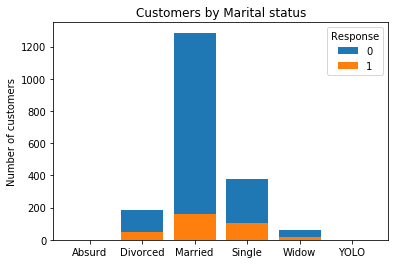

In [93]:
y0 = df.groupby(by=['Response','Marital_Status']).count()['ID'][0].values
y1 = df.groupby(by=['Response','Marital_Status']).count()['ID'][1].values
ind = df.groupby(by=['Response','Marital_Status']).count()['ID'][0].index

ax0=plt.axes()
ax0.bar(x=ind,height=y0)
ax0.bar(x=ind,height=y1)
ax0.legend(['0','1'],title = 'Response')
ax0.set_ylabel('Number of customers')
ax0.set_title('Customers by Marital status')

Still not much insight here, which is why the other features were created.

Text(0.5, 1.0, 'Customers by Couple-alone')

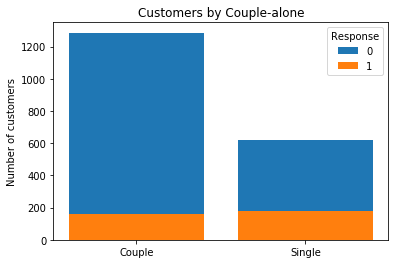

In [92]:
y0 = df.groupby(by=['Response','Couple-alone']).count()['ID'][0].values
y1 = df.groupby(by=['Response','Couple-alone']).count()['ID'][1].values
ind = df.groupby(by=['Response','Couple-alone']).count()['ID'][0].index

ax0=plt.axes()
ax0.bar(x=ind,height=y0)
ax0.bar(x=ind,height=y1)
ax0.legend(['0','1'],title = 'Response')
ax0.set_ylabel('Number of customers')
ax0.set_title('Customers by Couple-alone')

Now, **this** shows a slight tendency towards people that are not in a couple responding to the campaign. But still, we'll try and see if the "family type" brings any more clarity.

Text(0.5, 1.0, 'Customers by Family_type')

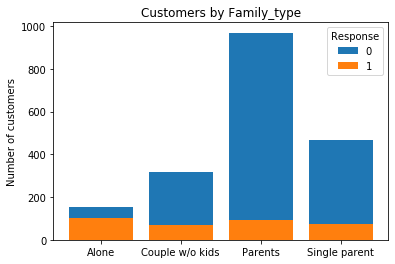

In [96]:
y0 = df.groupby(by=['Response','Family_type']).count()['ID'][0].values
y1 = df.groupby(by=['Response','Family_type']).count()['ID'][1].values
ind = df.groupby(by=['Response','Family_type']).count()['ID'][0].index

ax0=plt.axes()
ax0.bar(x=ind,height=y0)
ax0.bar(x=ind,height=y1)
ax0.legend(['0','1'],title = 'Response')
ax0.set_ylabel('Number of customers')
ax0.set_title('Customers by Family_type')

Finally, people that actually live alone seem to be much more likely to respond to the campaign then people who are in relationships or that have kids. And still, having kids also seems to influence the likelihood somewhat, when you compare "Couple w/o kids" to "Parents", or "Alone" to "Single parent".

We should still consider "Teenhome" as a separate feature for modelling, though, as the correlation is much higher than for "Kidhome".

In [84]:
df.corr()['Response']

#criar feature "is_store?"

ID                    -0.021968
Year_Birth             0.021325
Income                 0.133047
Kidhome               -0.080008
Teenhome              -0.154446
Recency               -0.198437
MntWines               0.247254
MntFruits              0.125289
MntMeatProducts        0.236335
MntFishProducts        0.111331
MntSweetProducts       0.117372
MntGoldProds           0.139850
NumDealsPurchases      0.002238
NumWebPurchases        0.148730
NumCatalogPurchases    0.220810
NumStorePurchases      0.039363
NumWebVisitsMonth     -0.003987
AcceptedCmp3           0.254258
AcceptedCmp4           0.177019
AcceptedCmp5           0.326634
AcceptedCmp1           0.293982
AcceptedCmp2           0.169293
Complain              -0.001707
Z_CostContact               NaN
Z_Revenue                   NaN
Response               1.000000
Age                   -0.021325
time_customer          0.194481
MntTotal               0.264440
MntRegular             0.261729
Children              -0.169163
Family_s

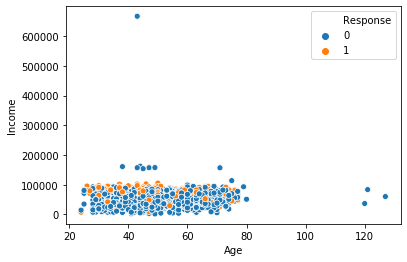

In [32]:
sns.scatterplot(x=df['Age'],y=df['Income'],hue=df['Response'])

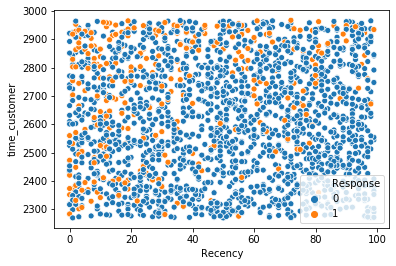

In [63]:
sns.scatterplot(x=df['Recency'],y=df['time_customer'],hue=df['Response'])

# new_customer = compraram nos últimos 6 meses. (talvez 3 por ser comida)
# ativos = 1 ano

Text(0.5, 1.0, 'Customers by AcceptedCmp1')

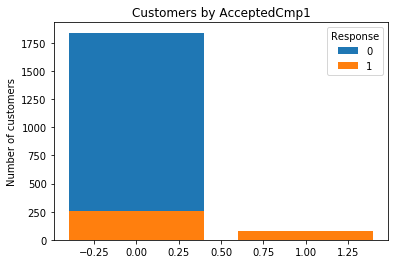

In [98]:
y0 = df.groupby(by=['Response','AcceptedCmp1']).count()['ID'][0].values
y1 = df.groupby(by=['Response','AcceptedCmp1']).count()['ID'][1].values
ind = df.groupby(by=['Response','AcceptedCmp1']).count()['ID'][0].index

ax0=plt.axes()
ax0.bar(x=ind,height=y0)
ax0.bar(x=ind,height=y1)
ax0.legend(['0','1'],title = 'Response')
ax0.set_ylabel('Number of customers')
ax0.set_title('Customers by AcceptedCmp1')

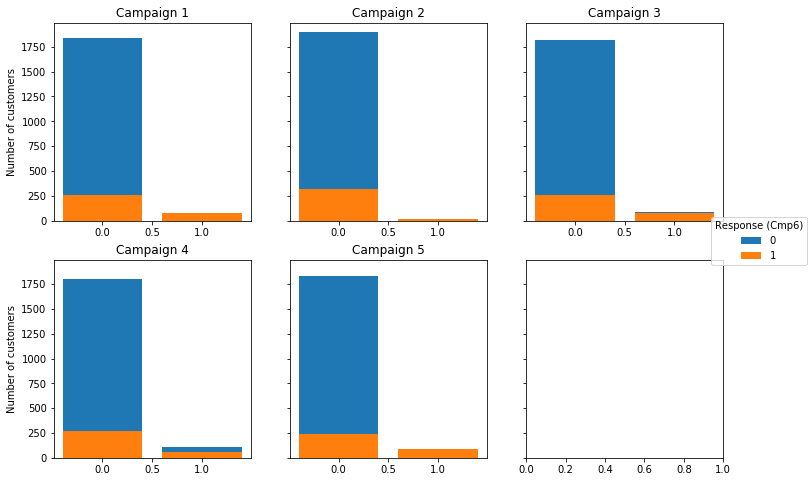

In [126]:
f, axs = plt.subplots(2,3,figsize=(12,8),sharey=True)


y0 = df.groupby(by=['Response','AcceptedCmp1']).count()['ID'][0].values
y1 = df.groupby(by=['Response','AcceptedCmp1']).count()['ID'][1].values
ind = df.groupby(by=['Response','AcceptedCmp1']).count()['ID'][0].index
ax1=axs[0][0]
ax1.bar(x=ind,height=y0)
ax1.bar(x=ind,height=y1)
ax1.set_ylabel('Number of customers')
ax1.set_title('Campaign 1')


y0 = df.groupby(by=['Response','AcceptedCmp2']).count()['ID'][0].values
y1 = df.groupby(by=['Response','AcceptedCmp2']).count()['ID'][1].values
ind = df.groupby(by=['Response','AcceptedCmp2']).count()['ID'][0].index
ax2=axs[0][1]
ax2.bar(x=ind,height=y0)
ax2.bar(x=ind,height=y1)
ax2.set_title('Campaign 2')


y0 = df.groupby(by=['Response','AcceptedCmp3']).count()['ID'][0].values
y1 = df.groupby(by=['Response','AcceptedCmp3']).count()['ID'][1].values
ind = df.groupby(by=['Response','AcceptedCmp3']).count()['ID'][0].index
ax3=axs[0][2]
ax3.bar(x=ind,height=y0)
ax3.bar(x=ind,height=y1)
ax3.set_title('Campaign 3')


y0 = df.groupby(by=['Response','AcceptedCmp4']).count()['ID'][0].values
y1 = df.groupby(by=['Response','AcceptedCmp4']).count()['ID'][1].values
ind = df.groupby(by=['Response','AcceptedCmp4']).count()['ID'][0].index
ax4=axs[1][0]
ax4.bar(x=ind,height=y0)
ax4.bar(x=ind,height=y1)
ax4.set_ylabel('Number of customers')
ax4.set_title('Campaign 4')


y0 = df.groupby(by=['Response','AcceptedCmp5']).count()['ID'][0].values
y1 = df.groupby(by=['Response','AcceptedCmp5']).count()['ID'][1].values
ind = df.groupby(by=['Response','AcceptedCmp5']).count()['ID'][0].index
ax5=axs[1][1]
ax5.bar(x=ind,height=y0)
ax5.bar(x=ind,height=y1)
ax5.set_title('Campaign 5')


f.legend((0,1),loc='right',title='Response (Cmp6)')
plt.show()

In [128]:
df['Number_cmp_acc'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Age,time_customer,MntTotal,MntRegular,Children,Most_bought,Family_size,Couple-alone,Family_type,Number_cmp_acc
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,63,2932,1529,1441,0,Wines,1.0,Single,Alone,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,66,2382,21,15,2,Wines,3.0,Single,Single parent,0
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,55,2581,734,692,0,Wines,2.0,Couple,Couple w/o kids,0
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,...,36,2408,48,43,1,Meats,3.0,Couple,Parents,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,39,2430,407,392,1,Wines,3.0,Couple,Parents,0


Text(0.5, 1.0, 'Customers by Number_cmp_acc')

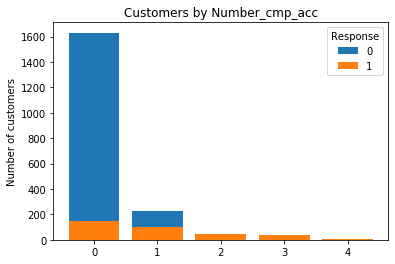

In [130]:
y0 = df.groupby(by=['Response','Number_cmp_acc']).count()['ID'][0].values
y1 = df.groupby(by=['Response','Number_cmp_acc']).count()['ID'][1].values
ind = df.groupby(by=['Response','Number_cmp_acc']).count()['ID'][0].index

ax0=plt.axes()
ax0.bar(x=ind,height=y0)
ax0.bar(x=ind,height=y1)
ax0.legend(['0','1'],title = 'Response')
ax0.set_ylabel('Number of customers')
ax0.set_title('Customers by Number_cmp_acc')

In [131]:
for i in df.index.values:
    flag=0
    if df.loc[i,'AcceptedCmp1']==1:
        flag+=10
        
    if df.loc[i,'AcceptedCmp2']==1:
        flag+=10
    elif df.loc[i,'AcceptedCmp2']==0:
        if flag > 0:
            flag-=1
    
    if df.loc[i,'AcceptedCmp3']==1:
        flag+=10
    elif df.loc[i,'AcceptedCmp3']==0:
        if flag > 0:
            flag-=1
    
    if df.loc[i,'AcceptedCmp4']==1:
        flag+=10
    elif df.loc[i,'AcceptedCmp4']==0:
        if flag > 0:
            flag-=1
    
    df.loc[i,'Flag'] = flag

In [135]:
df['Flag'].value_counts()

0.0     1836
9.0      135
10.0     108
7.0       73
18.0      58
19.0      16
29.0      13
8.0        1
Name: Flag, dtype: int64